# MSDS 460 Homework Assignment 1 Problems

### Question 2

In [79]:
from pulp import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# define problem
prob = LpProblem("problem", LpMaximize)

In [3]:
# define variables
x1 = LpVariable("x1", 0, None)
x2 = LpVariable("x2", 0, None)

In [4]:
# define objective
prob += -4*x1 + 2*x2

In [5]:
# define constraints
prob += -2*x1 + 2*x2 <= 7
prob += x1 >= 2
prob += x1 - 4*x2 <= 0
prob += 2*x1 + 2*x2 >= 10

In [6]:
# solve
status = prob.solve()
print(f"status={LpStatus[status]}")

status=Optimal


In [7]:
for variable in prob.variables():
        print(f'{variable.name} = {variable.varValue}')
print(f'Objective= {value(prob.objective)}')
print(f'')

x1 = 2.0
x2 = 5.5
Objective= 3.0



####  Solve the original LP graphically (to scale).  Clearly identify the feasible region and, if one or more exist, the optimal solution(s) (provide exact values for x1, x2, and Z).

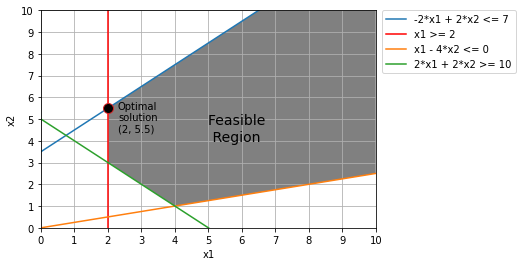

In [58]:
# plot optimal solution
x = np.arange(0, 12)
plt.plot(x, 3.5 + x, label = '-2*x1 + 2*x2 <= 7')
plt.axvline(x = 2, color = 'red', label = 'x1 >= 2')
plt.plot(x, x/4, label = 'x1 - 4*x2 <= 0')
plt.plot(x, 5 - x, label = '2*x1 + 2*x2 >= 10')

# define feasible region
x = [2, 4, 8, 10, 10, 2]
y = [3, 1, 2, 2.5, 13.5, 5.5]
plt.fill(x, y, 'grey')

plt.text(5, 4, 'Feasible \n Region', size ='14')
plt.plot(2, 5.5, marker="o", markersize=10, markerfacecolor="black")
plt.annotate('Optimal\nsolution\n(2, 5.5)', xy = (2.3, 4.4))

plt.xlabel('x1')
plt.ylabel('x2')
plt.axis([0, 10, 0, 10])
plt.xticks(np.arange(0, 11, 1)) 
plt.yticks(np.arange(0, 11, 1))
plt.grid(True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### Question 4

In [59]:
# define problem
prob = LpProblem("problem", LpMaximize)

In [60]:
# define variables
C1W = LpVariable("Cutlet 1 white", 0, None) # non-negativity
C1D = LpVariable("Cutlet 1 dark", 0, None) # non-negativity
C2W = LpVariable("Cutlet 2 white", 0, None) # non-negativity
C2D = LpVariable("Cutlet 2 dark", 0, None) # non-negativity
T1 = LpVariable("Type 1 Chicken", 0, None) # non-negativity
T2 = LpVariable("Type 2 Chicken", 0, None) # non-negativity

In [61]:
# define objective
prob += 4*(C1W + C1D) + 3*(C2W + C2D) - 10*T1 - 8*T2

In [62]:
# define constraints
prob += .7*(C1W + C1D) <= C1W # cutlet 1 must be at least 70% white meat
prob += .6*(C2W + C2D) <= C2W # cutlet 2 must be at least 60% white meat
prob += C1W + C1D <= 50 # At most, 50 lb of cutlet 1 can be sold
prob += C2W + C2D <= 30 # At most, 30 lb of cutlet 2 can be sold
prob += C1W + C2W <= 5*T1 + 3*T2 # type 1 turkey yields 5 lb of white meat and type 2 turkey yields 3 lb of white meat  
prob += C1D + C2D <= 2*T1 + 3*T2 # type 1 turkey yields 2 lb of dark meat and type 2 turkey yields 3 lb of dark meat

In [63]:
# solve
status = prob.solve()
print(f"status={LpStatus[status]}")

status=Optimal


In [64]:
for variable in prob.variables():
        print(f'{variable.name} = {variable.varValue}')
print(f'Objective= {value(prob.objective)}')
print(f'')

Cutlet_1_dark = 15.0
Cutlet_1_white = 35.0
Cutlet_2_dark = 12.0
Cutlet_2_white = 18.0
Type_1_Chicken = 8.6666667
Type_2_Chicken = 3.2222222
Objective= 177.55555539999997



### Question 5

In [95]:
# define problem
prob = LpProblem("problem", LpMinimize)

In [96]:
# define variables
Q1P = LpVariable("Q1_Production", 0, 200) # non-negativity, plant can produce a maximum of 200 units each quarter
Q2P = LpVariable("Q2_Production", 0, 200) # non-negativity, plant can produce a maximum of 200 units each quarter
Q3P = LpVariable("Q3_Production", 0, 200) # non-negativity, plant can produce a maximum of 200 units each quarter
Q4P = LpVariable("Q4_Production", 0, 200) # non-negativity, plant can produce a maximum of 200 units each quarter

Q1S = LpVariable("Q1_Storage", 0, 60) # non-negativity, storage facility can hold a maximum of 60 units
Q2S = LpVariable("Q2_Storage", 0, 60) # non-negativity, storage facility can hold a maximum of 60 units
Q3S = LpVariable("Q3_Storage", 0, 60) # non-negativity, storage facility can hold a maximum of 60 units
Q4S = LpVariable("Q4_Storage", 0, 60) # non-negativity, storage facility can hold a maximum of 60 units

In [97]:
# define objective
prob += 15*Q1P + 16*Q2P + 17*Q3P + 18*Q4P + 1.5*(Q1S + Q2S + Q3S + Q4S)

In [98]:
# define constraints
prob += Q1P >= 130 # constraint to meet Q1 demand of 130 units
prob += Q1P - 130 == Q1S # excess Q1 production to be stored at storage facility
 
prob += Q2P + Q1S >= 160 # constraint to meet Q2 demand of 160 units
prob += Q2P + Q1S - 160 == Q2S # excess Q2 production to be stored at storage facility

prob += Q3P + Q2S >= 250 # constraint to meet Q3 demand of 250 units
prob += Q3P + Q2S - 250 == Q3S # excess Q3 production to be stored at storage facility

prob += Q4P + Q3S >= 150 # constraint to meet Q4 demand of 150 units
prob += Q4P + Q3S- 150 == Q4S # excess Q4 production to be stored at storage facility


In [99]:
# solve
status = prob.solve()
print(f"status={LpStatus[status]}")

status=Optimal


In [100]:
for variable in prob.variables():
        print(f'{variable.name} = {variable.varValue}')
print(f'Objective= {value(prob.objective)}')
print(f'')

Q1_Production = 140.0
Q1_Storage = 10.0
Q2_Production = 200.0
Q2_Storage = 50.0
Q3_Production = 200.0
Q3_Storage = 0.0
Q4_Production = 150.0
Q4_Storage = 0.0
Objective= 11490.0

